In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [19]:
las = lasio.read(r'D:\Karim\15_9-19 BT2\STAT1990__30-1__15-9-19_SR__COMPOSITE__1.LAS')

In [20]:
df= las.df()

In [26]:
for count, par in enumerate(las.curves):
    print (f"curve :{par.mnemonic} \t Unit :{par.unit} \t The describtion :   {par.descr} ")
print (f'There is {count+1} curves in this log file') 

curve :DEPT 	 Unit :M 	 The describtion :   1  DEPTH 
curve :AC 	 Unit :US/F 	 The describtion :   2  Sonic Transit Time (Slowness) 
curve :CALI 	 Unit :IN 	 The describtion :   3  Caliper 
curve :DEN 	 Unit :G/CC 	 The describtion :   4  Bulk Density 
curve :GR 	 Unit :GAPI 	 The describtion :   5  Gamma Ray 
curve :NEU 	 Unit :% 	 The describtion :   6  Neutron Porosity 
curve :RDEP 	 Unit :OHMM 	 The describtion :   7  Deep Resistivity 
curve :RMED 	 Unit :OHMM 	 The describtion :   8  Medium Resistivity 
There is 8 curves in this log file


In [28]:
df.reset_index(inplace= True)

In [34]:
df.rename(columns=({'DEPT':'Depth','CALI':'Caliper','NEU':'Neutron','DEN':'Density'}),inplace = True)
df.head()

,Depth,AC,Caliper,Density,GR,Neutron,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


(4500.0, 4200.0)

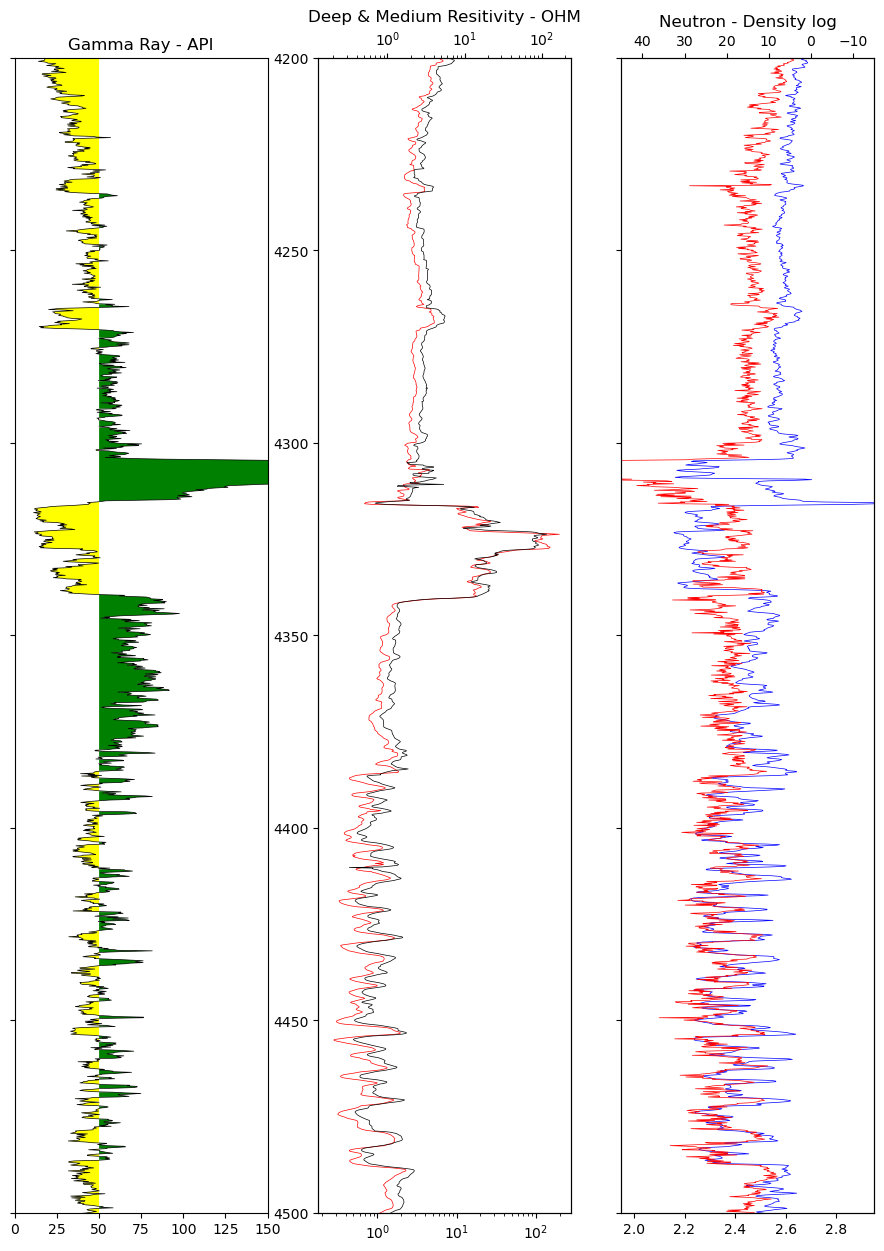

In [76]:
plt.figure(figsize = (15,15))
axis1 = plt.subplot2grid((3,4), (0,0), rowspan = 3)
axis2 = plt.subplot2grid((3,4), (0,1), rowspan = 3)
axis3 = plt.subplot2grid((3,4), (0,2), rowspan = 3)
axis4 = axis2.twiny()
axis5 = axis3.twiny()
for log in [axis1 , axis3]:
    plt.setp(log.get_yticklabels(), visible=False)

# Gamma Ray log
axis1.plot('GR','Depth' , data = df , lw = 0.5 , c= 'black' )
axis1.set_xlim(0,150)
axis1.set_ylim(4500,4200)
axis1.set_title('Gamma Ray - API')
axis1.fill_betweenx(df['Depth'] ,50, df['GR'] , where= df['GR']<=50  ,facecolor = 'yellow') # non shale if the GR lower than 50
axis1.fill_betweenx(df['Depth'] ,50, df['GR'] , where= df['GR']>=50  ,facecolor = 'green') # non shale if the GR higher than 50

# Deep Resistivity log
axis2.plot('RDEP','Depth', data = df , lw = 0.5 , c = 'red')
axis2.set_ylim(4500,4200)
axis2.semilogx()
axis2.set_title('Deep & Medium Resitivity - OHM')

# Medium Resitivity log
axis4.plot('RMED','Depth', data = df , lw = 0.5 , c = 'black')
axis4.set_ylim(4500,4200)
axis4.semilogx()

# Density log
axis3.plot('Density','Depth', data = df , lw = 0.5 , c = 'blue')
axis3.set_xlim(1.95,2.95)
axis3.set_ylim(4500,4200)
axis3.set_title('Neutron - Density log')

# Neutron log
axis5.plot('Neutron','Depth', data = df , lw = 0.5 , c = 'red')
axis5.set_xlim(45,-15)
axis5.set_ylim(4500,4200)
